In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm

# Visualization

In [3]:
df = pd.read_excel("abalone_dataset.xlsx")

In [4]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,M,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,I,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,I,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,M,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,I,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
sex               3132 non-null object
length            3132 non-null float64
diameter          3132 non-null float64
height            3132 non-null float64
whole_weight      3132 non-null float64
shucked_weight    3132 non-null float64
viscera_weight    3132 non-null float64
shell_weight      3132 non-null float64
type              3132 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [6]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.521392,0.405865,0.138263,0.818738,0.355398,0.178349,0.235616,1.991379
std,0.120756,0.099600,0.039206,0.489560,0.221473,0.109554,0.139215,0.824561
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.110000,0.436375,0.181500,0.090875,0.127500,1.000000
50%,0.540000,0.420000,0.140000,0.787000,0.330500,0.168000,0.225000,2.000000
75%,0.610000,0.480000,0.165000,1.141625,0.497500,0.250125,0.323625,3.000000
max,0.815000,0.650000,0.515000,2.825500,1.488000,0.760000,1.005000,3.000000


In [7]:
numeric = df.select_dtypes(include=[np.number]).columns
categoric = df.select_dtypes(include=[np.object]).columns

In [8]:
numeric

Index(['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'type'],
      dtype='object')

In [9]:
categoric

Index(['sex'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1F03B50B8>,
      dtype=object)

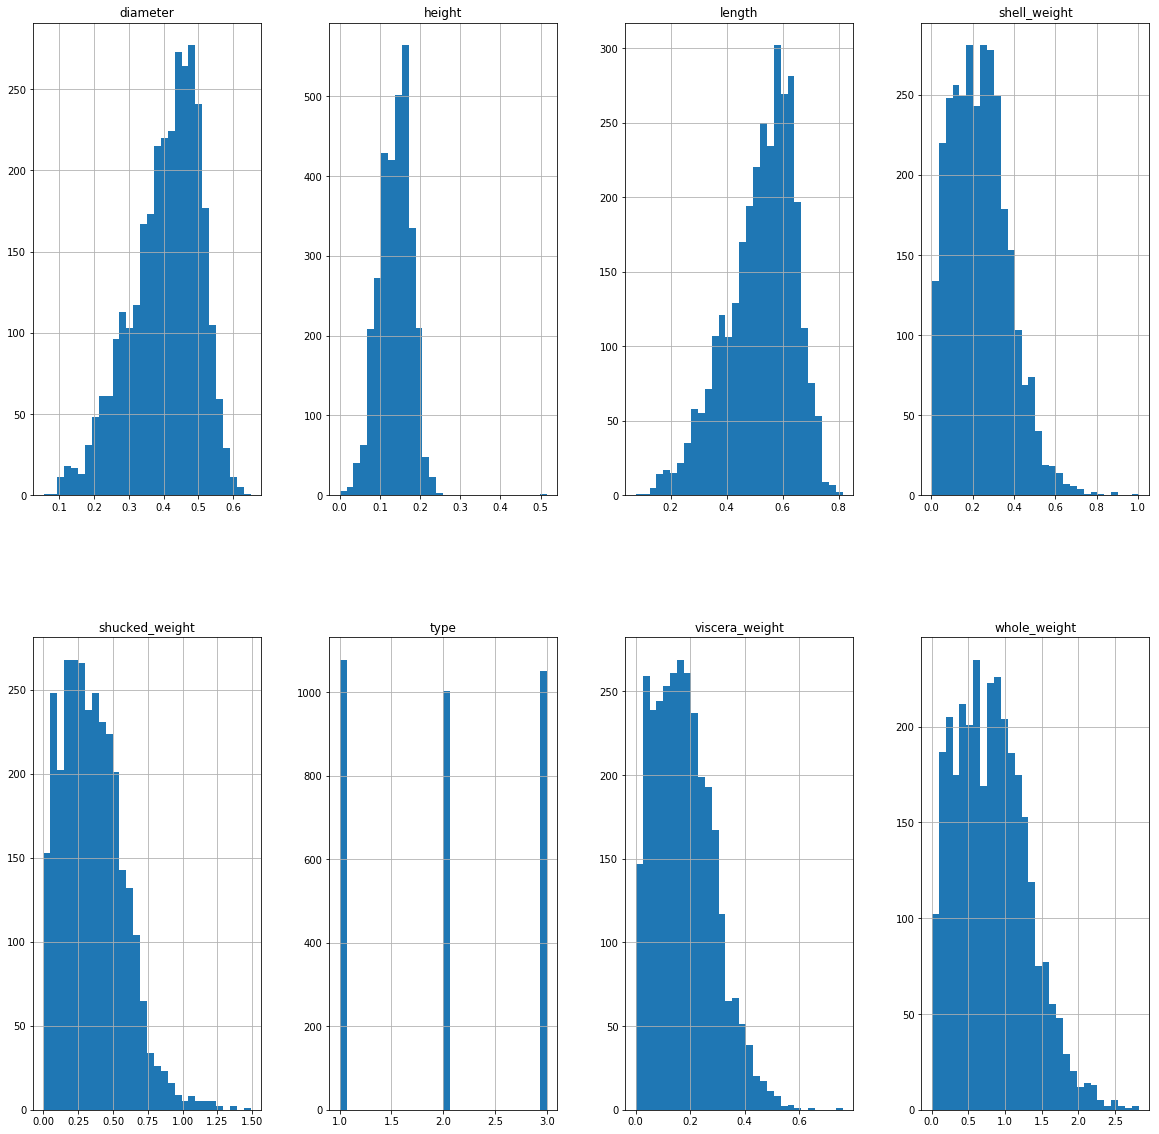

In [10]:
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

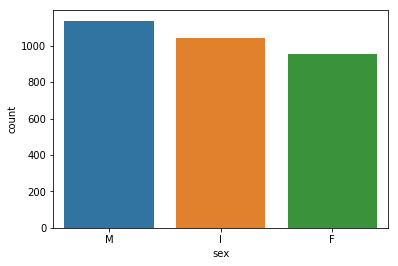

In [11]:
sns.countplot(x='sex', data = df)

In [12]:
print("\nSex Count in Percentage")
print(df.sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(df.sex.value_counts())


Sex Count in Percentage
M    0.363027
I    0.332695
F    0.304278
Name: sex, dtype: float64

Sex Count in Numbers
M    1137
I    1042
F     953
Name: sex, dtype: int64


   # Preprocessing Data for the Model

In [13]:
df['sex'] = LabelEncoder().fit_transform(df['sex'].tolist())

In [14]:
transformed_sex_feature = OneHotEncoder().fit_transform(df['sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df = pd.concat([df, df_sex_encoded], axis=1)

In [15]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type,sex_0,sex_1,sex_2
0,2,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3,0.0,0.0,1.0
1,1,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1,0.0,1.0,0.0
2,1,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1,0.0,1.0,0.0
3,2,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3,0.0,0.0,1.0
4,1,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1,0.0,1.0,0.0


# Data Splitting for Model

In [16]:
X = df.drop(['sex'], axis = 1)
Y = df['type']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [18]:
clf = svm.SVC(kernel='rbf', C=1, gamma=100)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
Acc=clf.score(X_test,Y_test)

In [19]:
Acc

0.9904458598726115